In [2]:
%cd ..

d:\github\ripple_heterogeneity\python


In [3]:
import pandas as pd
import numpy as np 
import glob
import matplotlib.pyplot as plt

import sys,os

import functions, loading

import nelpy as nel  # main nelpy imports
import nelpy.plotting as npl  # optional plotting import

import math
import seaborn as sns
from tqdm import tqdm

C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\nelpy\plotting\decoding.py:9: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.


In [4]:
df_sessions = pd.read_csv(r'D:\projects\ripple_heterogeneity\sessions.csv')
df_sessions

,basepath,basename
0,A:\Data\AB1\day1,day1
1,A:\Data\AB3\AB3_38_41,AB3_38_41
2,A:\Data\AB3\AB3_42_46,AB3_42_46
3,A:\Data\AB3\AB3_47_49,AB3_47_49
4,A:\Data\AB3\AB3_50_51,AB3_50_51
...,...,...
259,A:\OptoMECLEC\OML8\day5,day5
260,A:\OptoMECLEC\OML8\day6,day6
261,A:\OptoMECLEC\OML8\day7,day7
262,A:\OptoMECLEC\OML8\day8,day8


In [8]:
df = pd.DataFrame()
for session in df_sessions.itertuples():
    df_,_ = loading.load_cell_metrics(session.basepath)
    df = df.append(df_,ignore_index=True)
df["unit_id"] = np.arange(0,len(df))
df    

,UID,ab_ratio,acg_asymptote,acg_c,acg_d,acg_fit_rsquare,acg_h,acg_refrac,acg_tau_burst,acg_tau_decay,...,ripple_GainAll_WAKEnontheta,ripple_GainParticip_WAKEnontheta,ripple_nSpkParticip_WAKEnontheta,SWR_modulationIndex,SWR_modulationPeakResponseTime,SWR_modulationSignificanceLevel,pulses_modulationIndex,pulses_modulationPeakResponseTime,pulses_modulationSignificanceLevel,unit_id
0,1,0.189795,-1.536886,16.600993,5.926792,-0.012632,1.519140,2.665222,0.473357,13.446926,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,2,-0.473978,-27.743195,31.309431,9.307983,0.113868,7.106078,5.651872,1.241758,364.096610,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,3,0.276535,0.840785,10.122581,1.692910,0.037766,6.779466,5.106567,3.378457,4.203237,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
3,4,0.494590,-12.465753,33.095458,0.827498,0.171856,5.242403,2.772030,5.000000,70.220833,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
4,5,-0.026260,0.743235,20.955612,1.625509,0.140963,14.735462,5.356939,2.272208,3.567711,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23991,38,-0.253141,6.480625,26.434143,1.309059,0.962494,37.704936,5.134676,0.632508,16.770945,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23991
23992,39,-0.709992,5.192159,20.224571,1.332075,0.946354,23.050193,4.644559,1.053781,14.696014,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23992
23993,40,0.427750,10.455656,8.470314,2.091360,0.956686,13.371881,7.835525,2.067423,22.490743,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23993
23994,41,-0.726628,3.431355,27.632746,1.106588,0.938582,29.245503,4.950133,0.964397,17.009871,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23994


In [9]:
# remove columns that are >50% nan
nan_count = df.isna().sum()
idx = nan_count.values > df.shape[0]*.5 
df = df.drop(columns=df.keys()[idx])
df

,UID,ab_ratio,acg_asymptote,acg_c,acg_d,acg_fit_rsquare,acg_h,acg_refrac,acg_tau_burst,acg_tau_decay,...,ripple_particip_REMepisode,ripple_FRall_REMepisode,ripple_FRparticip_REMepisode,ripple_GainAll_REMepisode,ripple_GainParticip_REMepisode,ripple_nSpkParticip_REMepisode,ripple_particip_MA_REM,ripple_FRall_MA_REM,ripple_GainAll_MA_REM,unit_id
0,1,0.189795,-1.536886,16.600993,5.926792,-0.012632,1.519140,2.665222,0.473357,13.446926,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,2,-0.473978,-27.743195,31.309431,9.307983,0.113868,7.106078,5.651872,1.241758,364.096610,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,3,0.276535,0.840785,10.122581,1.692910,0.037766,6.779466,5.106567,3.378457,4.203237,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
3,4,0.494590,-12.465753,33.095458,0.827498,0.171856,5.242403,2.772030,5.000000,70.220833,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
4,5,-0.026260,0.743235,20.955612,1.625509,0.140963,14.735462,5.356939,2.272208,3.567711,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23991,38,-0.253141,6.480625,26.434143,1.309059,0.962494,37.704936,5.134676,0.632508,16.770945,...,0.555556,5.192108,8.947655,4.244979,7.640962,1.600,NaN,NaN,NaN,23991
23992,39,-0.709992,5.192159,20.224571,1.332075,0.946354,23.050193,4.644559,1.053781,14.696014,...,0.444444,4.543094,10.566417,5.145518,11.577416,1.750,NaN,NaN,NaN,23992
23993,40,0.427750,10.455656,8.470314,2.091360,0.956686,13.371881,7.835525,2.067423,22.490743,...,0.888889,17.523364,19.201336,2.216757,2.493852,3.375,NaN,NaN,NaN,23993
23994,41,-0.726628,3.431355,27.632746,1.106588,0.938582,29.245503,4.950133,0.964397,17.009871,...,0.888889,13.629283,14.405364,6.473628,7.282831,2.625,NaN,NaN,NaN,23994


In [ ]:
# df1 = df.drop(['ripple_FRall','ripple_particip'], axis=1)

# wide to long format for states

In [10]:
df.loc[(df.brainRegion=="lCA1") | (df.brainRegion=="rCA1"),'brainRegion'] = "CA1"
df.brainRegion.unique()

array(['CA1', 'CA3', 'Unknown', 'DG', 'CA2', 'MEC', 'blv', 'ven', 'ladl',
       'den', 'pir', 'plc01', 'bmp', 'cpu', 'EC3', 'EC5', 'EC4', nan,
       'EC2', 'DGCA3', 'EC1', 'CTX', 'CA', 'NCX', 'PFC', 'CA3DG'],
      dtype=object)

In [11]:
df_states = pd.DataFrame()
# states to look at
states = ['_NREMepisode','_WAKEepisode']
# grouping vars
id_vars = ["unit_id","basepath","basename","animal","putativeCellType","brainRegion","deepSuperficial"]
# locate column names
fields = df.keys()
# iter through each state
for s in states:
    # locate the columns with that state indicator
    idx = fields.str.contains(s)
    # seperate the var name from state indicator
    field_names = [st.split(s)[0] for st in fields[idx]]
    # create temp df with vars of interest
    temp_df = pd.DataFrame(df[id_vars + list(fields[idx].values)].values,
                            columns=id_vars + field_names)
    # add the state indicator                        
    temp_df['state'] = s
    # append the temp dfs together into long format :) 
    df_states = df_states.append(temp_df)

for key in df_states.keys():
    df_states[key] = [item for item in df_states[key]]
df_states

,unit_id,basepath,basename,animal,putativeCellType,brainRegion,deepSuperficial,burstIndex,cv2,firingRateISI,firingRate,ripple_particip,ripple_FRall,ripple_FRparticip,ripple_GainAll,ripple_GainParticip,ripple_nSpkParticip,state
0,0,A:\Data\AB1\day1,day1,AB1,Pyramidal Cell,CA1,Deep,0.000000,0.995996,0.153536,0.053245,0.009582,0.062532,6.559871,0.432198,45.105802,1.000000,_NREMepisode
1,1,A:\Data\AB1\day1,day1,AB1,Pyramidal Cell,CA1,Superficial,0.000000,0.954719,0.078416,0.051026,0.020035,0.153488,7.365480,2.761430,137.831379,1.173913,_NREMepisode
2,2,A:\Data\AB1\day1,day1,AB1,Narrow Interneuron,CA1,Superficial,0.005222,1.048367,0.660306,0.425402,0.107143,0.739016,6.827916,1.430531,13.351621,1.056911,_NREMepisode
3,3,A:\Data\AB1\day1,day1,AB1,Narrow Interneuron,CA1,Superficial,0.000000,1.058308,0.267928,0.122573,0.018293,0.119379,6.352690,0.478915,26.180697,1.000000,_NREMepisode
4,4,A:\Data\AB1\day1,day1,AB1,Pyramidal Cell,CA3,Superficial,0.000000,1.005605,0.136529,0.070438,0.014808,0.096641,6.522430,0.492988,33.291162,1.000000,_NREMepisode
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23991,23991,A:\OptoMECLEC\OML8\day9,day9,OML8,Pyramidal Cell,CA1,Deep,0.166883,1.109779,20.297700,1.119561,0.420920,6.074388,14.290706,5.136792,12.203726,2.300898,_WAKEepisode
23992,23992,A:\OptoMECLEC\OML8\day9,day9,OML8,Pyramidal Cell,CA1,Superficial,0.104399,1.135450,10.804970,0.910896,0.282924,2.861325,10.061915,3.119134,11.024644,1.612472,_WAKEepisode
23993,23993,A:\OptoMECLEC\OML8\day9,day9,OML8,Narrow Interneuron,CA1,Superficial,0.047519,0.962529,17.016449,7.820975,0.817265,11.496679,14.014020,1.487527,1.820128,2.242868,_WAKEepisode
23994,23994,A:\OptoMECLEC\OML8\day9,day9,OML8,Pyramidal Cell,CA1,Superficial,0.149825,1.160320,9.334163,1.760062,0.517958,7.315350,13.976443,3.659886,7.065985,2.251825,_WAKEepisode


In [6]:
# temp_df = df_states[(df_states.putativeCellType=="Pyramidal Cell") & (df_states.brainRegion=="CA1")]


# f, ax = plt.subplots(figsize=(7, 6))
# ax.set_yscale("log")

# sns.boxplot(x="state",
#             y="firingRate",
#             hue="deepSuperficial",
#             data=temp_df,
#             whis=[0, 100],
#             width=.6,
#             palette="bone",
#             saturation=1)

# # Add in points to show each observation
# sns.stripplot(x="state",
#             y="firingRate",
#             hue="deepSuperficial",
#             data=temp_df,
#             size=4,
#             color=".3",
#             linewidth=0,
#             dodge=True,
#             alpha=.1)

# ax.yaxis.grid(True)
# ax.set(xlabel="")
# sns.despine(trim=True, left=True)

In [22]:
tex_fonts = {
#     # Use LaTeX to write all text
#     "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 10,
    "font.size": 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    "svg.fonttype": 'none'
}
plt.style.use('seaborn-paper')
plt.rcParams.update(tex_fonts)

# plt.rcParams['svg.fonttype'] = 'none'

%config InlineBackend.figure_format = 'retina'

In [23]:
from matplotlib.ticker import AutoMinorLocator

group_colors = {"Deep_WAKEepisode": '#7b3294',
            "Deep_NREMepisode": '#c2a5cf',
            'Superficial_WAKEepisode': '#008837',
            'Superficial_NREMepisode': '#a6dba0'} 

def ecdf(x):
    xs = np.sort(x)
    ys = np.linspace(0,1,len(xs))
    return xs, ys

def plot_ecdf(var,df,state,sublayer,ax,group_colors):
        y = df[(df.deepSuperficial == sublayer) & (df.state == state)]
        if y.empty == False:
            xs, ys = ecdf(y[var])
            ax.plot(xs,ys,color=group_colors[y.deepSuperficial.iloc[0]+y.state.iloc[0]],linewidth=1)

C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: AutoMinorLocator does not work with logarithmic scale


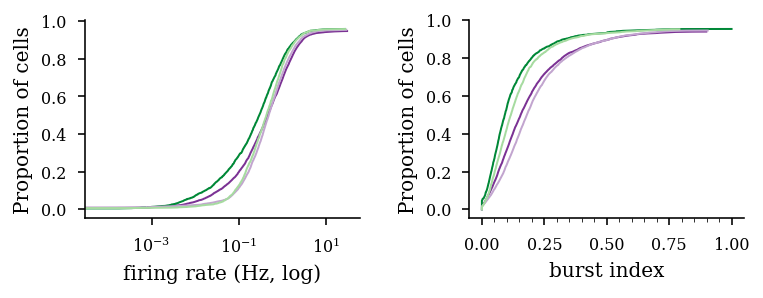

In [25]:
temp_df = df_states[(df_states.putativeCellType=="Pyramidal Cell") & (df_states.brainRegion=="CA1")]

fig, axs = plt.subplots(1,2, figsize=functions.set_size('thesis', fraction=1, subplots=(1, 2)), edgecolor='k')
fig.subplots_adjust(hspace = 0, wspace=0.4)
axs = axs.ravel()

plot_ecdf("firingRate",temp_df,"_WAKEepisode","Deep",axs[0],group_colors)
plot_ecdf("firingRate",temp_df,"_WAKEepisode","Superficial",axs[0],group_colors)

plot_ecdf("firingRate",temp_df,"_NREMepisode","Deep",axs[0],group_colors)
plot_ecdf("firingRate",temp_df,"_NREMepisode","Superficial",axs[0],group_colors)
axs[0].set_xscale('log')
axs[0].set_xlabel('firing rate (Hz, log)')
axs[0].set_ylabel('Proportion of cells')


plot_ecdf("burstIndex",temp_df,"_WAKEepisode","Deep",axs[1],group_colors)
plot_ecdf("burstIndex",temp_df,"_WAKEepisode","Superficial",axs[1],group_colors)

plot_ecdf("burstIndex",temp_df,"_NREMepisode","Deep",axs[1],group_colors)
plot_ecdf("burstIndex",temp_df,"_NREMepisode","Superficial",axs[1],group_colors)
# axs[1].set_xscale('log')
axs[1].set_xlabel('burst index')
axs[1].set_ylabel('Proportion of cells')


for i in range(2):
    right_side = axs[i].spines["right"]
    right_side.set_visible(False)
    top_side = axs[i].spines["top"]
    top_side.set_visible(False)
    axs[i].xaxis.set_minor_locator(AutoMinorLocator())

C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: AutoMinorLocator does not work with logarithmic scale


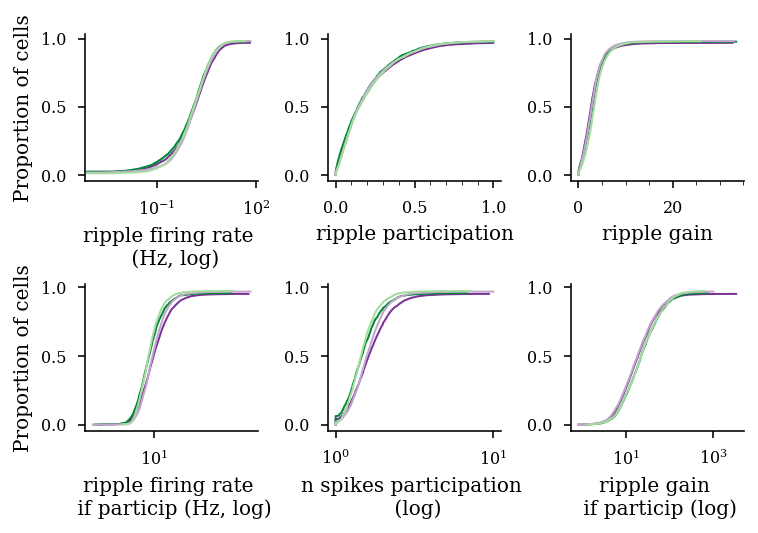

In [46]:
fig, axs = plt.subplots(2,3, figsize=functions.set_size('thesis', fraction=1, subplots=(1, 1)), edgecolor='k')
fig.subplots_adjust(hspace = 0.7, wspace=0.4)
axs = axs.ravel()

plot_ecdf("ripple_FRall",temp_df,"_WAKEepisode","Deep",axs[0],group_colors)
plot_ecdf("ripple_FRall",temp_df,"_WAKEepisode","Superficial",axs[0],group_colors)
plot_ecdf("ripple_FRall",temp_df,"_NREMepisode","Deep",axs[0],group_colors)
plot_ecdf("ripple_FRall",temp_df,"_NREMepisode","Superficial",axs[0],group_colors)
axs[0].set_xscale('log')
axs[0].set_xlabel('ripple firing rate \n (Hz, log)')
axs[0].set_ylabel('Proportion of cells')

plot_ecdf("ripple_particip",temp_df,"_WAKEepisode","Deep",axs[1],group_colors)
plot_ecdf("ripple_particip",temp_df,"_WAKEepisode","Superficial",axs[1],group_colors)
plot_ecdf("ripple_particip",temp_df,"_NREMepisode","Deep",axs[1],group_colors)
plot_ecdf("ripple_particip",temp_df,"_NREMepisode","Superficial",axs[1],group_colors)
axs[1].set_xlabel('ripple participation')

plot_ecdf("ripple_GainAll",temp_df,"_WAKEepisode","Deep",axs[2],group_colors)
plot_ecdf("ripple_GainAll",temp_df,"_WAKEepisode","Superficial",axs[2],group_colors)
plot_ecdf("ripple_GainAll",temp_df,"_NREMepisode","Deep",axs[2],group_colors)
plot_ecdf("ripple_GainAll",temp_df,"_NREMepisode","Superficial",axs[2],group_colors)
axs[2].set_xlabel('ripple gain')


plot_ecdf("ripple_FRparticip",temp_df,"_WAKEepisode","Deep",axs[3],group_colors)
plot_ecdf("ripple_FRparticip",temp_df,"_WAKEepisode","Superficial",axs[3],group_colors)
plot_ecdf("ripple_FRparticip",temp_df,"_NREMepisode","Deep",axs[3],group_colors)
plot_ecdf("ripple_FRparticip",temp_df,"_NREMepisode","Superficial",axs[3],group_colors)
axs[3].set_xscale('log')
axs[3].set_xlabel('ripple firing rate \n if particip (Hz, log)')
axs[3].set_ylabel('Proportion of cells')

plot_ecdf("ripple_nSpkParticip",temp_df,"_WAKEepisode","Deep",axs[4],group_colors)
plot_ecdf("ripple_nSpkParticip",temp_df,"_WAKEepisode","Superficial",axs[4],group_colors)
plot_ecdf("ripple_nSpkParticip",temp_df,"_NREMepisode","Deep",axs[4],group_colors)
plot_ecdf("ripple_nSpkParticip",temp_df,"_NREMepisode","Superficial",axs[4],group_colors)
axs[4].set_xscale('log')
axs[4].set_xlabel('n spikes participation \n (log)')

plot_ecdf("ripple_GainParticip",temp_df,"_WAKEepisode","Deep",axs[5],group_colors)
plot_ecdf("ripple_GainParticip",temp_df,"_WAKEepisode","Superficial",axs[5],group_colors)
plot_ecdf("ripple_GainParticip",temp_df,"_NREMepisode","Deep",axs[5],group_colors)
plot_ecdf("ripple_GainParticip",temp_df,"_NREMepisode","Superficial",axs[5],group_colors)
axs[5].set_xscale('log')
axs[5].set_xlabel('ripple gain \n if particip (log)')

for i in range(6):
    right_side = axs[i].spines["right"]
    right_side.set_visible(False)
    top_side = axs[i].spines["top"]
    top_side.set_visible(False)
    axs[i].xaxis.set_minor_locator(AutoMinorLocator())

# ripple_FRparticip	ripple_GainParticip	ripple_nSpkParticip

In [ ]:
for key in df.keys():
    print(key)

UID
ab_ratio
acg_asymptote
acg_c
acg_d
acg_fit_rsquare
acg_h
acg_refrac
acg_tau_burst
acg_tau_decay
acg_tau_rise
animal
brainRegion
burstIndex_Doublets
burstIndex_MA
burstIndex_MA_REM
burstIndex_Mizuseki2012
burstIndex_NREMepisode
burstIndex_NREMpacket
burstIndex_NREMstate
burstIndex_REMepisode
burstIndex_REMstate
burstIndex_Royer2012
burstIndex_THETA
burstIndex_WAKEepisode
burstIndex_WAKEstate
burstIndex_nonTHETA
cellID
cluID
cluster_index
cv2
cv2_MA
cv2_MA_REM
cv2_NREMepisode
cv2_NREMpacket
cv2_NREMstate
cv2_REMepisode
cv2_REMstate
cv2_THETA
cv2_WAKEepisode
cv2_WAKEstate
cv2_nonTHETA
deepSuperficial
electrodeGroup
firingRate
firingRateCV
firingRateGiniCoeff
firingRateISI
firingRateISI_MA
firingRateISI_MA_REM
firingRateISI_NREMepisode
firingRateISI_NREMpacket
firingRateISI_NREMstate
firingRateISI_REMepisode
firingRateISI_REMstate
firingRateISI_THETA
firingRateISI_WAKEepisode
firingRateISI_WAKEstate
firingRateISI_nonTHETA
firingRateInstability
firingRate_MA
firingRate_MA_REM
firingRate